# Projeto 1 de Ciência dos Dados

Nome: Mayra Peter da Rocha Loures

Pergunta: A inflação e o índice de mortalidade infantil tem relação com o IDH de um mesmo país??

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

 Importando os dados de IDH, mortalidade infantil e inflação:

In [2]:
idh = pd.read_excel('hdi_human_development_index.xlsx')
morteinfantil = pd.read_excel('child_mortality_0_5_year_olds_dying_per_1000_born.xlsx')
inflacao = pd.read_excel('inflation_annual_percent.xlsx')

Escolhendo o ano de 2015 e renomeando as colunas:

In [3]:
idh_2015 = idh.loc[:, ["geo", 2015]]
idh_2015 = idh_2015.rename(columns={'geo': 'País'})
idh_2015 = idh_2015.rename(columns={2015: 'IDH em 2015'})

morte_2015 = morteinfantil.loc[:, ["geo", 2015]]
morte_2015 = morte_2015.rename(columns={'geo': 'País'})
morte_2015 = morte_2015.rename(columns={2015: 'Mortalidade infantil em 2015'})

inflacao_2015 = inflacao.loc[:, ["geo", 2015]]
inflacao_2015 = inflacao_2015.rename(columns={'geo': 'País'})
inflacao_2015 = inflacao_2015.rename(columns={2015: 'Inflação em 2015'})

Juntando as tabelas:

In [4]:
idh_idx = idh_2015.set_index('País')
morte_idx = morte_2015.set_index('País')
inflacao_idx = inflacao_2015.set_index('País')

junto = idh_idx.join(inflacao_idx, how='inner', lsuffix='_idh', rsuffix='_inflacao')
tudo = junto.join(morte_idx, how="inner")
tudo.sort_values(by = ['IDH em 2015'])

,IDH em 2015,Inflação em 2015,Mortalidade infantil em 2015
País,,,
Central African Republic,0.352,6.160,129.0
Niger,0.353,0.920,95.0
Chad,0.396,-8.090,131.0
Burkina Faso,0.402,-3.070,88.5
Burundi,0.404,4.860,74.6
Guinea,0.414,2.820,92.0
Mozambique,0.418,4.380,75.1
South Sudan,0.418,0.468,93.8
Sierra Leone,0.420,19.600,119.0


Criando um arquivo excel com a nova tabela:

In [5]:
writer = pd.ExcelWriter('Projeto1.xlsx')
tudo.to_excel(writer,'data')
writer.save()

# Relacionando IDH e inflação:

A correlação entre o IDH em 2015 e a inflação em 2015 é: -0.1651316279912016


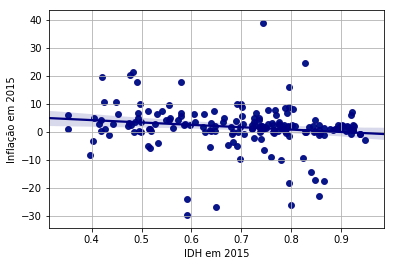

In [23]:
tudo.plot.scatter(x='IDH em 2015',y='Inflação em 2015');
sns.regplot(tudo["IDH em 2015"],tudo["Inflação em 2015"], color=('navy'))
plt.grid()
print('A correlação entre o IDH em 2015 e a inflação em 2015 é:', tudo['IDH em 2015'].corr(tudo['Inflação em 2015']))

# Relacionando IDH e mortalidade infantil:

A correlação entre o IDH em 2015 e a mortalidade infantil em 2015 é: -0.8878100403470439


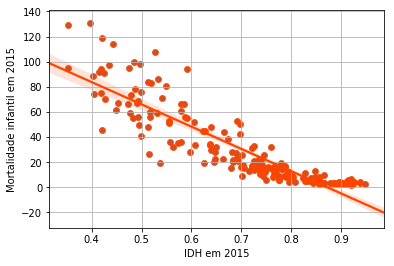

In [89]:
tudo.plot.scatter(x='IDH em 2015',y='Mortalidade infantil em 2015');
sns.regplot(tudo["IDH em 2015"],tudo["Mortalidade infantil em 2015"], color=('orangered'))
#plt.axis([0.7, 1, 0, 20])
plt.grid()
print('A correlação entre o IDH em 2015 e a mortalidade infantil em 2015 é:', tudo['IDH em 2015'].corr(tudo['Mortalidade infantil em 2015']))

# Relacionando inflação e mortalidade infantil:

A correlação entre a inflação em 2015 e a mortalidade infantil em 2015 é: 0.07160820857159401


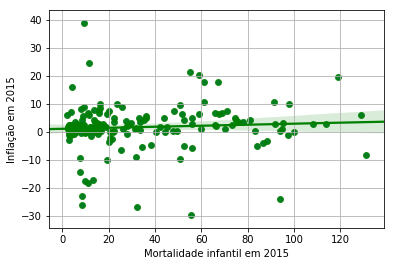

In [21]:
tudo.plot.scatter(x='Mortalidade infantil em 2015',y='Inflação em 2015');
sns.regplot(tudo["Mortalidade infantil em 2015"],tudo["Inflação em 2015"], color=('green'))
plt.grid()
print('A correlação entre a inflação em 2015 e a mortalidade infantil em 2015 é:', tudo['Inflação em 2015'].corr(tudo['Mortalidade infantil em 2015']))

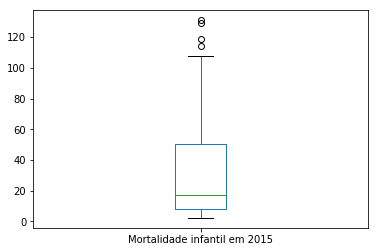

In [11]:
tudo.loc[:, "Mortalidade infantil em 2015"].plot.box()

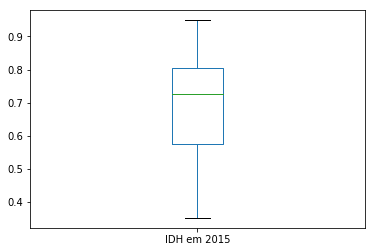

In [12]:
tudo.loc[:, "IDH em 2015"].plot.box()

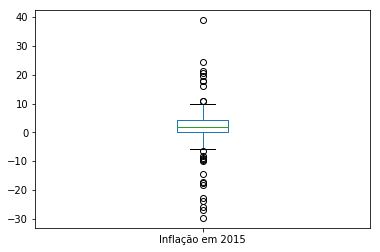

In [66]:
tudo.loc[:, "Inflação em 2015"].plot.box()

In [98]:
introducao = '      Com objetivo de analisar e concluir se os índices de inflação e de morte infantil de cada nação estão relacionados com o IDH ou entre si, foram coletados dados do site: https://www.gapminder.org/tools/ para analise. Nesta, foram levados em conside-ração apenas os dados de 2015.'
dados = '      Quando plotado o gráfico de inflação por IDH, foi possível concluir que os dados não são correlacionados, pois mesmo o   IDH (valores no eixo X) aumentando, a grande maioria das correspondentes inflações (valores no eixo Y), continuam na faixa  en-tre 10 e -10. Apenas com exceção de alguns países que tem inflação acima ou abaixo dessa faixa, tal fato não ocorre em uma faixa de IDH específica, mostrando que não há correlação. Concordando com essa afirmação, o valor da correlação é:'
dados1 = '      Quando plotado o gráfico de mortalidade infantil por IDH, foi possível concluir que há correlação entre eles. Conforme o IDH (valores no eixo X) aumenta, a mortalidade infantil (valores no eixo Y) diminui, sendo vísivel que os países com IDH acima de 0,85 tem um índice de mortalidade infantil menor ou igual a 10. Conforme tal observação, o valor da correlação é:'
dados2 = '      Quando plotado o gráfico de inflação por mortalidade infantil, foi possível concluir que não existe correlação. Mesmo a mortalidade infantil (valores no eixo X) aumentando, a grande maioria das correspondentes inflações (valores no eixo Y), continuam na faixa entre 10 e -10. Apenas com exceção de alguns países que tem inflação acima ou abaixo dessa faixa, tal fato não ocorre em uma faixa de mortalidade infantil específica, mostrando que não há correlação. Uma observação a partir do gráfico seria que, os países com menor mortalidade infantil tem uma inflação proxima de zero. Concordando com a pouco correlação, o valor desta é:'

# Conclusão:

In [99]:
print(introducao)
print(dados)
print(tudo['IDH em 2015'].corr(tudo['Inflação em 2015']))
print(dados1)
print(tudo['IDH em 2015'].corr(tudo['Mortalidade infantil em 2015']))
print(dados2)
print(tudo['Inflação em 2015'].corr(tudo['Mortalidade infantil em 2015']))

      Com objetivo de analisar e concluir se os índices de inflação e de morte infantil de cada nação estão relacionados com o IDH ou entre si, foram coletados dados do site: https://www.gapminder.org/tools/ para analise. Nesta, foram levados em conside-ração apenas os dados de 2015.
      Quando plotado o gráfico de inflação por IDH, foi possível concluir que os dados não são correlacionados, pois mesmo o   IDH (valores no eixo X) aumentando, a grande maioria das correspondentes inflações (valores no eixo Y), continuam na faixa  en-tre 10 e -10. Apenas com exceção de alguns países que tem inflação acima ou abaixo dessa faixa, tal fato não ocorre em uma faixa de IDH específica, mostrando que não há correlação. Concordando com essa afirmação, o valor da correlação é:
-0.1651316279912016
      Quando plotado o gráfico de mortalidade infantil por IDH, foi possível concluir que há correlação entre eles. Conforme o IDH (valores no eixo X) aumenta, a mortalidade infantil (valores no eixo Y) 